In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re

In [3]:
df= pd.read_csv(r"C:\Users\KIIT0\Downloads\fake_or_real_news.csv (1)\fake_or_real_news.csv")

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.shape

(6335, 4)

In [6]:
df.to_csv('fake_oorr_real.csv')

In [7]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from tensorflow.keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
df = pd.read_csv(r"C:\Users\KIIT0\Downloads\fake_oorr_real.xls")
df =df.reindex(np.random.permutation(df.index))
df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label
4054,4054,10308,Explosive Assange/Pilger Interview on US Elect...,"By wmw_admin on November 6, 2016 Darkmoon — No...",FAKE
2770,2770,7706,Emma Watson Urges US Women to Consider Gender ...,Getty - Timothy A. Clary \nBritish actress Emm...,FAKE
3314,3314,4602,When white nationalists show up to 'monitor' t...,Many Americans of different political stripes ...,REAL
4086,4086,1396,Iowa's secretary of state rips Ted Cruz over c...,"""Today I was shown a piece of literature from ...",REAL
3932,3932,2962,Will any of Obama's ISIS proposals succeed?,Washington (CNN) President Barack Obama's tele...,REAL


In [9]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)
df.head()

,title,text,label
4054,Explosive Assange/Pilger Interview on US Elect...,"By wmw_admin on November 6, 2016 Darkmoon — No...",FAKE
2770,Emma Watson Urges US Women to Consider Gender ...,Getty - Timothy A. Clary \nBritish actress Emm...,FAKE
3314,When white nationalists show up to 'monitor' t...,Many Americans of different political stripes ...,REAL
4086,Iowa's secretary of state rips Ted Cruz over c...,"""Today I was shown a piece of literature from ...",REAL
3932,Will any of Obama's ISIS proposals succeed?,Washington (CNN) President Barack Obama's tele...,REAL


In [10]:
df=df.dropna()

In [11]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
df.head()

,title,text,label
4054,Explosive Assange/Pilger Interview on US Elect...,"By wmw_admin on November 6, 2016 Darkmoon — No...",FAKE
2770,Emma Watson Urges US Women to Consider Gender ...,Getty - Timothy A. Clary \nBritish actress Emm...,FAKE
3314,When white nationalists show up to 'monitor' t...,Many Americans of different political stripes ...,REAL
4086,Iowa's secretary of state rips Ted Cruz over c...,"""Today I was shown a piece of literature from ...",REAL
3932,Will any of Obama's ISIS proposals succeed?,Washington (CNN) President Barack Obama's tele...,REAL


In [13]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [14]:
df['nb_words'] = df.title.apply(lambda x: len(x.split()))
df['nb_unique_words'] = df.title.apply(lambda x: len(set(x.split())))
df['nb_char'] = df.title.apply(lambda x: len(x))
df["nb_special"] = df.apply(lambda p: sum( not q.isalpha() for q in p["title"] ), axis=1)
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
df['nb_punct'] = df.title.apply(lambda x: punct(x))
stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
df['nb_stopwords'] = df.title.apply(lambda x: stop(x))

def title(text):
    return(len([w for w in text.split() if w.istitle()]))
df['nb_title_case'] = df.title.apply(lambda x: title(x))
def upper(text):
    return(len([w for w in text.split() if w.isupper()]))
df['nb_title_case'] = df.title.apply(lambda x: upper(x))

token = nltk.word_tokenize(''.join(df.title))
frequent = nltk.FreqDist(token)
frequent.most_common(15)


[(':', 1618),
 (',', 1409),
 ('’', 1380),
 ('to', 1285),
 ('the', 1170),
 ('of', 865),
 ('in', 853),
 ('Trump', 803),
 ('s', 728),
 ('for', 595),
 ('The', 591),
 ('on', 589),
 ('and', 564),
 ("'s", 561),
 ('?', 554)]

In [15]:
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]
frequent.most_common(15)

[('’', 1380),
 ('Trump', 803),
 ('The', 591),
 ("'s", 561),
 ('Clinton', 553),
 ('To', 399),
 ('Hillary', 393),
 ('‘', 363),
 ('”', 268),
 ('“', 265),
 ('In', 259),
 ('Obama', 242),
 ('Is', 228),
 ('Of', 206),
 ('GOP', 201)]

In [16]:
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words]))
df['nb_freq_words'] = df.title.apply(lambda x: freq(x))

In [17]:
df.head()

,title,text,label,nb_words,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words
4054,Explosive Assange/Pilger Interview on US Elect...,"By wmw_admin on November 6, 2016 Darkmoon — No...",FAKE,11,11,79,12,0,2,1,2
2770,Emma Watson Urges US Women to Consider Gender ...,Getty - Timothy A. Clary \nBritish actress Emm...,FAKE,17,17,99,19,0,2,1,1
3314,When white nationalists show up to 'monitor' t...,Many Americans of different political stripes ...,REAL,9,9,54,10,0,3,0,0
4086,Iowa's secretary of state rips Ted Cruz over c...,"""Today I was shown a piece of literature from ...",REAL,10,10,60,10,0,2,0,2
3932,Will any of Obama's ISIS proposals succeed?,Washington (CNN) President Barack Obama's tele...,REAL,7,7,43,8,0,2,1,2


In [18]:
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words])/len(text.split()))
df['avg_freq_word']= df.title.apply(lambda x: freq(x))

In [19]:
df.head()

,title,text,label,nb_words,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words,avg_freq_word
4054,Explosive Assange/Pilger Interview on US Elect...,"By wmw_admin on November 6, 2016 Darkmoon — No...",FAKE,11,11,79,12,0,2,1,2,0.181818
2770,Emma Watson Urges US Women to Consider Gender ...,Getty - Timothy A. Clary \nBritish actress Emm...,FAKE,17,17,99,19,0,2,1,1,0.058824
3314,When white nationalists show up to 'monitor' t...,Many Americans of different political stripes ...,REAL,9,9,54,10,0,3,0,0,0.000000
4086,Iowa's secretary of state rips Ted Cruz over c...,"""Today I was shown a piece of literature from ...",REAL,10,10,60,10,0,2,0,2,0.200000
3932,Will any of Obama's ISIS proposals succeed?,Washington (CNN) President Barack Obama's tele...,REAL,7,7,43,8,0,2,1,2,0.285714


<Axes: xlabel='label', ylabel='count'>

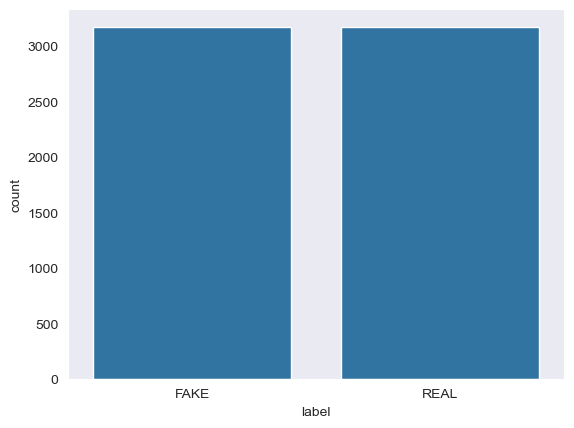

In [20]:
sns.set_style("dark")
sns.countplot(x='label', data=df)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

In [22]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df["title"]=df['title'].apply(remove_stopwords)

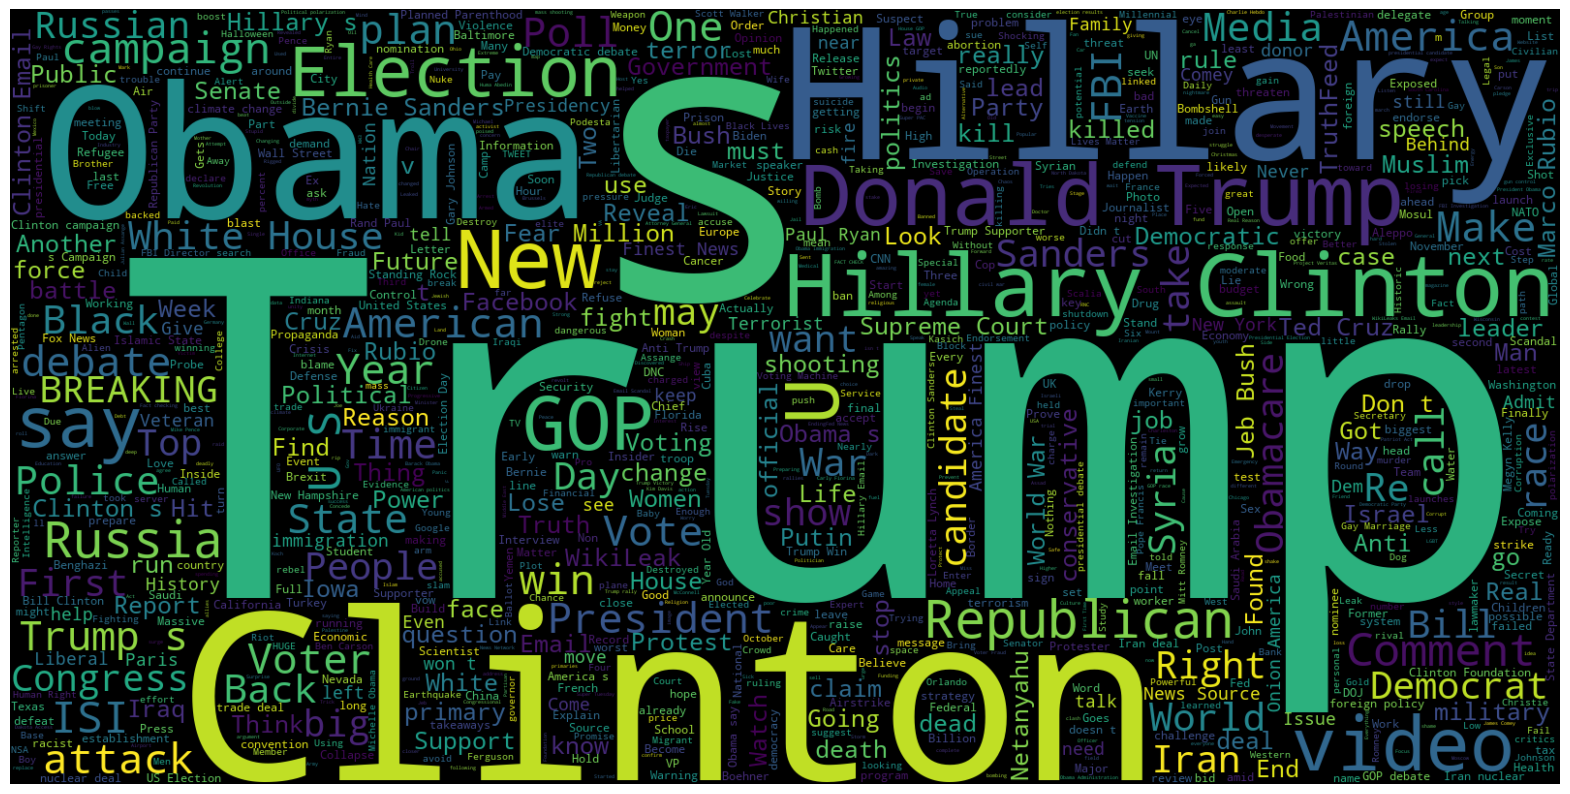

In [50]:
# Ensure you have 'title' column data
text = " ".join(df['title'].astype(str))  # Convert all titles to string

# Generate the word cloud
wc = WordCloud(max_words=1000, width=1600, height=800).generate(text)

# Plot the word cloud
plt.figure(figsize=(20, 20))  # Set figure size
plt.imshow(wc, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis
plt.show()


In [52]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
df = pd.read_csv(r"C:\Users\KIIT0\Downloads\fake_oorr_real.xls")

df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [122]:
def extract_txt(Body):
    if isinstance(Body, str):  # Check if the value is a string
        regex = re.search(r"(?<=\(Reuters\)\s\-\s).*", Body)
        if regex:
            return regex.group(0)
    return Body  # Return the original value if it's not a string or no match

# Handle NaN values and apply the function
df['title'] = df['title'].fillna('')  # Replace NaN with an empty string
df['text_processed'] = df['title'].apply(extract_txt)

In [124]:
df.columns = df.columns.str.strip()

In [126]:
if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
else:
    print("Column 'Unnamed: 0' not found.")


In [128]:
if 'Unnamed: 0.1' in df.columns:
    df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
else:
    print("Column 'Unnamed: 0.1' not found.")


In [130]:
df.head()


,title,text,label,text_processed
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matters


In [132]:
df['final_news'] = df['title'] + " " + df['text_processed']
df.head()

,title,text,label,text_processed,final_news
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear,You Can Smell Hillary’s Fear You Can Smell Hil...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy,Kerry to go to Paris in gesture of sympathy Ke...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matters,The Battle of New York: Why This Primary Matte...


In [134]:
cols_del =['title','text','text_processed']
df = df.drop(cols_del,axis=1)

df.head(20)

,label,final_news
0,FAKE,You Can Smell Hillary’s Fear You Can Smell Hil...
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy Ke...
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matte...
5,FAKE,"Tehran, USA Tehran, USA"
6,FAKE,Girl Horrified At What She Watches Boyfriend D...
7,REAL,‘Britain’s Schindler’ Dies at 106 ‘Britain’s S...
8,REAL,Fact check: Trump and Clinton at the 'commande...
9,REAL,Iran reportedly makes new push for uranium con...


In [136]:
stop = stopwords.words('english')

def cleanText(txt):
  # lowercaing
    txt = txt.lower()
  # removing stopwords
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',txt)
    return txt  

In [138]:
df['final_news'] = df['final_news'].apply(cleanText)
df.head()

,label,final_news
0,FAKE,smell hillary s fear smell hillary s fear
1,FAKE,watch exact moment paul ryan committed politic...
2,REAL,kerry go paris gesture sympathy kerry go paris...
3,FAKE,bernie supporters twitter erupt anger dnc we...
4,REAL,battle new york primary matters battle new yo...


In [161]:
# Replace 'real' with 1 and 'fake' with 0, while leaving existing numeric values unchanged
df['label'] = df['label'].replace({"real": 1, "fake": 0})


In [163]:
df.head()

,label,final_news
0,0,smell hillary s fear smell hillary s fear
1,0,watch exact moment paul ryan committed politic...
2,1,kerry go paris gesture sympathy kerry go paris...
3,0,bernie supporters twitter erupt anger dnc we...
4,1,battle new york primary matters battle new yo...


In [167]:
df.to_csv('fake_or_real_final.csv')

In [169]:
path = r"C:\Users\KIIT0\Downloads\fake_oorr_real.xls"

EMBEDDING_FILE=f'{path}/glove.6B.50d.txt'

# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 100

In [171]:
y = df['label'].values
X = df.drop(['label'],axis=1)

In [173]:
y.shape

(6335,)

In [175]:
EMBEDDING_FILE = r"C:/Users/KIIT0/Downloads/glove.6B.50d.txt"

print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))


Loading word vectors...
Found 400000 word vectors.


In [176]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(X['final_news']))
X = tokenizer.texts_to_sequences(list(X['final_news']))

X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (6335, 100)


In [177]:
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 9819 unique tokens.


In [178]:
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [180]:
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

C:\Users\KIIT0\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [216]:
from keras.layers import Conv1D, MaxPooling1D, GRU
from keras.layers import Input, Embedding, Bidirectional, GlobalMaxPool1D, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2

# Define constants
MAX_SEQUENCE_LENGTH = 100
VOCAB_SIZE = 20000
EMBEDDING_DIM = 100

# Input Layer
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Embedding Layer
x = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(input_)

# Convolutional Layer
x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)

# First Bidirectional GRU layer
x = Bidirectional(GRU(16, return_sequences=True))(x)
x = BatchNormalization()(x)

# Second Bidirectional GRU layer
x = Bidirectional(GRU(8, return_sequences=True))(x)
x = BatchNormalization()(x)

# Pooling Layer
x = GlobalMaxPool1D()(x)

# Fully Connected Layer with L2 regularization and increased Dropout
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.6)(x)

# Output Layer
output = Dense(1, activation="sigmoid")(x)

# Compile Model with Gradient Clipping
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
model = Model(input_, output)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Training Model
BATCH_SIZE = 8
EPOCHS = 100
VALIDATION_SPLIT = 0.2

# Train the model
r = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


C:\Users\KIIT0\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 102s 111ms/step - accuracy: 0.4968 - loss: 1.0216 - val_accuracy: 0.5572 - val_loss: 0.8215
Epoch 2/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 51s 100ms/step - accuracy: 0.6177 - loss: 0.7852 - val_accuracy: 0.6982 - val_loss: 0.7184
Epoch 3/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 53s 104ms/step - accuracy: 0.7531 - loss: 0.6572 - val_accuracy: 0.7229 - val_loss: 0.6530
Epoch 4/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.8517 - loss: 0.5247 - val_accuracy: 0.7525 - val_loss: 0.6192
Epoch 5/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 49s 96ms/step - accuracy: 0.9082 - loss: 0.4068 - val_accuracy: 0.7544 - val_loss: 0.6572
Epoch 6/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - accuracy: 0.9430 - loss: 0.3033 - val_accuracy: 0.7564 - val_loss: 0.6844
Epoch 7/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 49s 96ms/step - accuracy: 0.9540 - loss: 0.2402 - val_accuracy: 0.7594 - val_loss: 0.7213
Epoch 8/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 47s 93ms/step - accuracy: 0.9741 - lo

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [218]:
from keras.callbacks import EarlyStopping

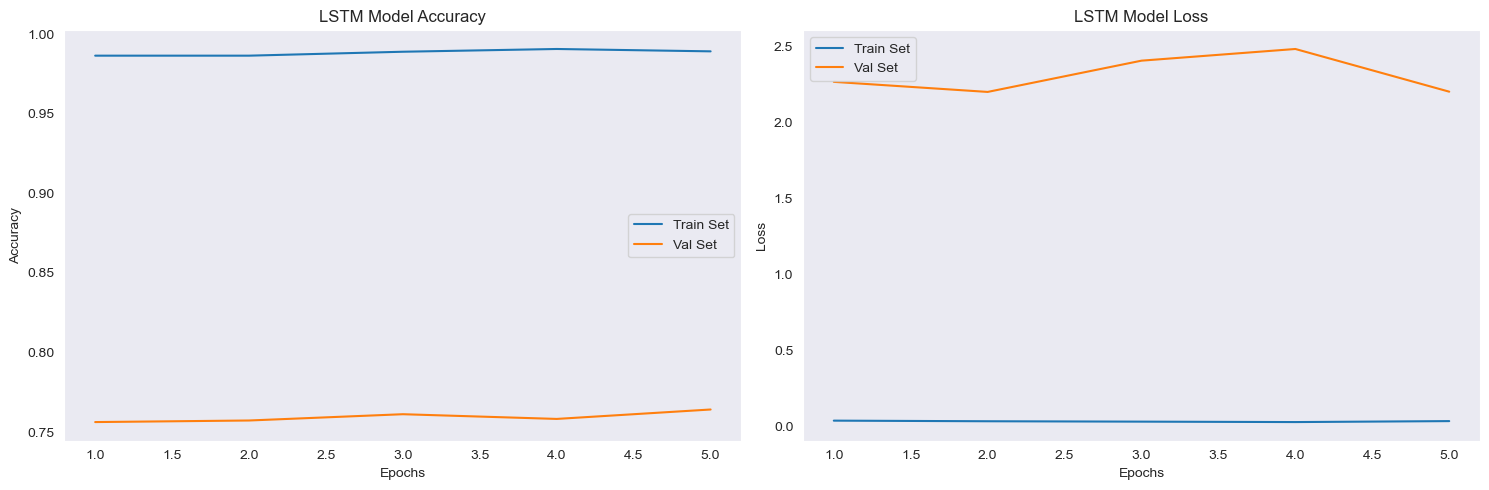

In [220]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1, len(r.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()

In [246]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9927 - loss: 0.0595
Accuracy of the model on Training Data is -  95.06708979606628
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7787 - loss: 1.9353
Accuracy of the model on Testing Data is -  76.47987604141235


In [222]:
pred = model.predict(X_test)
pred[:5]

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step


array([[4.9525083e-06],
       [5.5928946e-02],
       [9.9997991e-01],
       [9.9999744e-01],
       [9.9846411e-01]], dtype=float32)

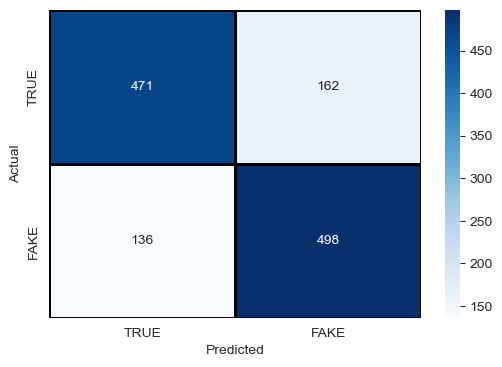

In [248]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [250]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       633
           1       0.75      0.79      0.77       634

    accuracy                           0.76      1267
   macro avg       0.77      0.76      0.76      1267
weighted avg       0.77      0.76      0.76      1267



In [225]:
y_pred = model.predict(X_test).ravel()

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


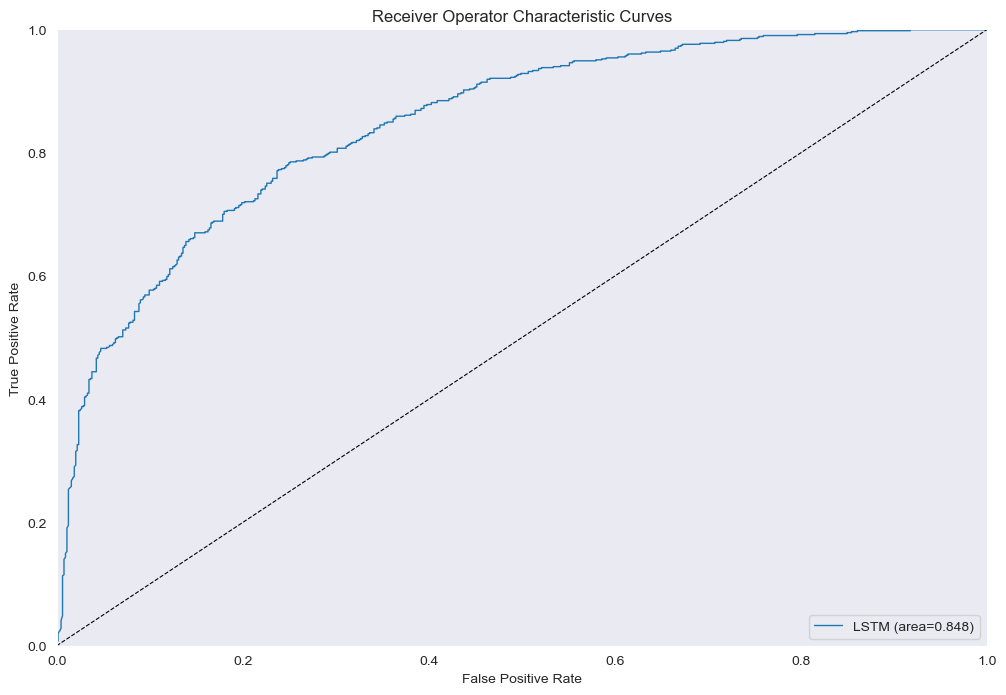

In [226]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curve
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)" % (label, roc_auc_score(y_true, y_proba)))

# Clear previous figures and plots
plt.clf()
plt.close()

# Create a new figure and axis
f, ax = plt.subplots(figsize=(12, 8))

# Plot the ROC curve for the model
roc_auc_plot(y_test, y_pred, label='LSTM', l='-')

# Plot a diagonal no-skill classifier line
ax.plot([0, 1], [0, 1], color='k', linewidth=0.8, linestyle='--')

# Customize the plot
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')

# Remove excess borders
sns.despine()

# Show the plot
plt.show()

In [227]:
testSent = ["""
Image copyright Getty Images
On Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.
This, in itself, isn't exactly huge news. It's far from the first time the president has turned his rhetorical cannons on his own ranks.
This time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.
He said Mr Corker "begged" for the president's endorsement, which he refused to give. He wrongly claimed that Mr Corker's support of the Iranian nuclear agreement was his only political accomplishment.
Unlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn't hold his tongue.
Skip Twitter post by @SenBobCorker It's a shame the White House has become an adult day care center. Someone obviously missed their shift this morning. — Senator Bob Corker (@SenBobCorker) October 8, 2017 Report
That wasn't the end of it, though. He then spoke with the New York Times and really let the president have it. Here are four choice quotes from the Tennessee senator's interview with the Times and why they are particularly damning.
"I don't know why the president tweets out things that are not true. You know he does it, everyone knows he does it, but he does."
You can't really sugarcoat this one. Mr Corker is flat-out saying the president is a liar - and everyone knows it.
The senator, in particular, is challenging Mr Trump's insistence that he unsuccessfully pleaded for his endorsement, but the accusation is much broader.
Mr Corker and the president used to be something akin to allies. The Tennessean was on Mr Trump's short list for vice-president and secretary of state.
Image copyright Getty Images Image caption Bob Corker at Trump campaign rally in July 2016
Those days are seemingly very much over now - and it's not like Mr Corker is going anywhere anytime soon. Although he's not running for re-election, he'll be in the Senate, chairing a powerful committee, until January 2019.
The president's margin for success in that chamber is razor-thin. If Democrats can continue to stand together in opposition, he can afford to lose only two votes out of 52 Republican senators. That's why healthcare reform collapsed in July - and it could be bad news for tax efforts.
From here on out, Mr Corker isn't going to do the president any favours.
"Look, except for a few people, the vast majority of our caucus understands what we're dealing with here."
Frustration in Congress has been growing over what Republicans feel has been the president's inability to focus on advancing their agenda. Getting a sharply divided party to come together on plans to repeal Obamacare, reform taxes or boost infrastructure spending is challenging enough. Doing so when the president stirs up unrelated controversies on a seemingly daily basis makes things all the harder.
One of the president's gifts has been his ability to shake off negative stories by quickly moving on to a different subject. That worked brilliantly during his presidential campaign, but it's less effective during the legislative slow grind.
Image copyright Getty Images Image caption Corker at the confirmation hearing for Secretary of State Rex Tillerson
For months, Republicans in Congress have been grumbling about this in the background and among themselves. Occasionally, someone like Mr McConnell will lament that the president doesn't understand how the Senate works.
Mr Corker has now stated it loud and clear. And, what's more, he says almost everyone agrees with him. They've kept silent until now because they still hope to pass conservative legislation that the president can sign or fear Mr Trump's legions will back a primary challenge next year or stay home during the general election.
If that calculus ever changes - if it becomes riskier to stay silent than speak out - Mr Trump will be in real trouble.
"A lot of people think that there is some kind of 'good cop, bad cop' act underway, but that's just not true."
Time and again, Mr Trump has appeared to undercut Secretary of State Rex Tillerson and others in his administration who are attempting to use soft diplomacy to deal with a range of international crises.
The war against the Taliban in Afghanistan, Iran's compliance with the multinational nuclear agreement, the ongoing dispute between Qatar and its Persian Gulf neighbours, the unrest in Venezuela and, most recently, North Korea's continued ballistic missile tests have all been the target of the president's offhand remarks and Twitter invective.
Some administration defenders have said this is all a part of Mr Trump's strategy - an updated version of the Nixon-era "madman theory", in which the president forces adversaries to give way because they fear an unpredictable US leader's actions.
Mr Corker isn't buying it. There's no strategy, he says, just the possibility of chaos - which he hopes Mr Trump's senior advisers will be able to avoid.
"I know for a fact that every single day at the White House, it's a situation of trying to contain him."
There's now a growing collection of John Kelly face-palm photos that serve as a testament to the chief-of-staff's reported frustration at dealing with the president.
Mr Trump goes off-script to praise torch-bearing white nationalists at a rally in Charlottesville, and Mr Kelly is captured closing his eyes and rubbing the arch of his nose, as if attempting to stave off a migraine.
Image copyright Reuters Image caption White House Chief of Staff John Kelly looks on as US President Donald Trump speaks at a campaign rally
The president calls North Korean leaders "criminals" in a speech to the United Nations, and Mr Kelly straight-up buries his face in his hands.
The White House communications team is often left scrambling to try to explain or reframe an indelicate presidential "joke" or remark that directly contradicts what was until then the official administration line.
Even though Mr Kelly has brought some discipline to the West Wing staff, the president still marches to the beat of his own drum - and continues to have unfettered access to his phone's Twitter app.
Bob Corker is only the latest person - politician, journalist, sports star or celebrity - to feel the mercurial president's uncontainable ire.
""",
"""
By Aaron Kesel
As former White House chief of staff and current Chicago Mayor Rahm Emanuel has said: “You never let a serious crisis go to waste.” While everyone was worried about the hurricanes, U.S. President Donald Trump signed away the Fourth Amendment buried in a new bill. He set a precedent by empowering the police state to allow warrantless searches in parts of VA, MD and D.C. near the Metro train system.
The government can now openly enter and search private property without a warrant in parts of Virginia, Maryland and D.C.
The House Joint Resolution 76 was signed into law on Tuesday, Aug. 22, by President Trump. The text is rather boring, starting off with: “Granting the consent and approval of Congress for the Commonwealth of Virginia, the State of Maryland, and the District of Columbia to enter into a compact relating to the establishment of the Washington Metrorail Safety Commission.”
CNN explained, “This law lets Virginia, Maryland and the District of Columbia form a new panel called the Washington Metrorail Safety Commission to oversee the safety of the D.C.-area public transportation Metro train system.”
The new safety commission will take over from the current Federal Transit Agency (FTA), which has been in charge of safety oversight for the Washington Metropolitan Area Interstate Compact (WMATA) since October 2015.
“We’ll set this up and get the FTA out of Metro. They are happy to get out, and we’re happy to get them out,” Metro Board of Directors Chair Jack Evans told Bloomberg BNA. “I’m glad we got this thing. If nothing else, we’ll get our money.”
However, buried within the bill’s text is a daunting “one major red flag” that would give the newly formed commission “the authority to enter property near the Metro Rail System ‘without limitation’ and without a warrant, for the purpose of ‘making inspections, investigations, examinations, and testing,” The Free Thought Project reported.
The legislation reads:
In performing its duties, the Commission, through its Board or designated employees or agents, may: Enter upon the WMATA Rail System and, upon reasonable notice and a finding by the chief executive officer that a need exists, upon any lands, waters, and premises adjacent to the WMATA Rail System, including, without limitation, property owned or occupied by the federal government, for the purpose of making inspections, investigations, examinations, and testing as the Commission may deem necessary to carry out the purposes of this MSC Compact, and such entry shall not be deemed a trespass.
Only five Congressman voted against the bill according to U.S. Rep Justin Amash (R-Mich.) while three hundred ninety-nine gave their approval, and 29 didn’t bother to vote at all. Apparently, our elected officials can’t be bothered to stand up for the rights of we the people or the Constitution they swore to protect. After all, the Fourth Amendment doesn’t exist, which protects Americans from unreasonable searches and seizures or anything. As Amash pointed out, the government will now be able to kick in the doors of any private property surrounding the border of the DC Metro Rail System without needing a warrant based on any probable cause.
Only 5 of us voted against bill allowing govt to enter/search private property in parts of VA, MD & DC w/o warrant. https://t.co/SVhTWqbPaB — Justin Amash (@justinamash) July 18, 2017 FREE Stormproof, Waterproof Survival Match Kit (Ad)
A scary prospect indeed, as Rachel Blevins wrote for The Free Thought Project, “While it may only affect the Washington, D.C., metro area now, it could be laying the blueprint for future legislation across the country.”
Aaron Kesel writes for Activist Post and is Director of Content for Coinivore. Follow Aaron at Twitter and Steemit.
This article is Creative Commons and can be republished in full with attribution. Like Activist Post on Facebook, subscribe on YouTube, follow on Twitter and at Steemit.
Image Credit: The Anti-Media
"""
]


In [228]:
def cleanText(txt):
    txt = txt.lower()
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
    txt = re.sub('[^a-z]',' ',txt)
    return txt  


In [229]:
def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(lst_text)
    testX = pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])

    prediction = model.predict(testX)
    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleanText)
    df_test['prediction']=df_test['prediction'].apply(lambda x: "Fake" if x>=0.5 else "Real")
    return df_test

In [230]:
df_testsent = predict_text(testSent)
df_testsent

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


,test_sent,prediction
0,image copyright getty images sunday morning d...,Real
1,aaron kesel former white house chief staff cur...,Real
